<img src="https://mikkolad.github.io/lundpython/imgs/front_4.png" width="1400">

<h1><center> Course website </center></h1>

To download all lecture files and see the schedule, please visit:

[mikkolad.github.io/lundpython/](https://mikkolad.github.io/lundpython/)


Each lecture contains (as notebooks)
- Manual 
- Exercises
- Presentation

---

#### Today we are going to be using a selection of tools to work through an example of how to improve a piece of code. 

In [1]:
def sieve(n): 
    primes=[]
    test=list(range(2,n+1))
    while test[0]<n**0.5:
        p = test.pop(0)
        primes.append(p)
        new_list = []
        for n in test:
            if n%p:
                new_list.append(n)
        test = new_list
    return primes+test

primes = sieve(50)
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 49]


# Testing

   #### "If debugging is the process of removing bugs, then programming must be the process of putting them in."
    - Edsger W. Dijkstra

In order to find bugs, we test our code. Just running the code is a form of testing, but we can do it in a more structured way.

Since we are inside a Jupyter notebook we are going to use [ipytest](https://pypi.org/project/ipytest/), details in the manual. 

In [2]:
import ipytest
ipytest.autoconfig()

In [3]:
%%ipytest

def test_sieve():
    assert sieve(19) == [2, 3, 5, 7, 11, 13, 17, 19]
    
    assert len(sieve(100)) == 25

.                                                                                            [100%]
======================================== warnings summary =========================================
..\..\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  C:\Users\Simon\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
    return isinstance(x, collections.Callable)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
1 passed, 1 warning in 0.05s


# So you found a bug

In [4]:
print(sieve(9))

[2, 3, 5, 7, 9]


What to do now? 
 - Update test
 - Fix the bug

In [5]:
%%ipytest

# The test that reveals the problems
def test_sieve():
    assert sieve(19) == [2, 3, 5, 7, 11, 13, 17, 19]
    assert sieve(9) == [2, 3, 5, 7] # test for when n is a perfect square of a prime
    assert len(sieve(100)) == 25

F                                                                                            [100%]
============================================ FAILURES =============================================
___________________________________________ test_sieve ____________________________________________

    def test_sieve():
        assert sieve(19) == [2, 3, 5, 7, 11, 13, 17, 19]
>       assert sieve(9) == [2, 3, 5, 7] # test for when n is a perfect square of a prime
E       assert [2, 3, 5, 7, 9] == [2, 3, 5, 7]
E         Left contains one more item: 9
E         Full diff:
E         - [2, 3, 5, 7]
E         + [2, 3, 5, 7, 9]
E         ?            +++

C:\Users\Simon\AppData\Local\Temp/ipykernel_10708/1073474627.py:4: AssertionError
===================================== short test summary info =====================================
FAILED tmpcjawor16.py::test_sieve - assert [2, 3, 5, 7, 9] == [2, 3, 5, 7]
1 failed in 1.05s


When `n` is the square of a prime, the output is includes `n` at the end of the output. 

This is because if `test[0] == n**2` the while loop is stopped early and the last number is not checked. 

The solution is to change `while test[0]<n**0.5: ` to `while test[0]<=n**0.5:`. 

In [6]:
def sieve(n):
    primes=[]
    test=list(range(2,n+1) )
    while test[0]<=n**0.5:
        p = test.pop(0) 
        primes.append(p)
        new_list = []
        for n in test:
            #Test divisability
            if n%p:
                new_list.append(n) 
        test = new_list
    return primes+test

primes = sieve(9)
print( primes)

[2, 3, 5, 7]


In [ ]:
def movmean(xdata, ydata, window):
    ydata_new = np.zeros(len(ydata))
    xdata_new = np.zeros(len(xdata))
    k = int(window/2)
    for i in range(len(ydata)):
        if i < window:
            ydata_new[i] = np.mean(ydata[:(i+k)])
            xdata_new[i] = np.mean(xdata[:(i+k)])
        elif i > len(ydata)-window:
            ydata_new[i] = np.mean(ydata[(i-k):])
            xdata_new[i] = np.mean(xdata[(i-k):])
        else:
            ydata_new[i] = np.mean(ydata[(i-k):(i+k)])
            xdata_new[i] = np.mean(xdata[(i-k):(i+k)])
    return(xdata_new, ydata_new)

This is a [moving average](https://en.wikipedia.org/wiki/Moving_average).

# Peformance optimization & profiling

You might find that code you've written runs (very) slowly. In order to identify what the source of your slowness is you'll want to use profilers.  

You've already encountered [timeit](https://docs.python.org/3/library/timeit.html) so let's go over some more extensive alternatives.  

First, let's import the things we need.

In [7]:
%load_ext heat
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt

We'll keep working on the `sieve()` function.

Text(0, 0.5, 'Number of primes smaller than $n$')

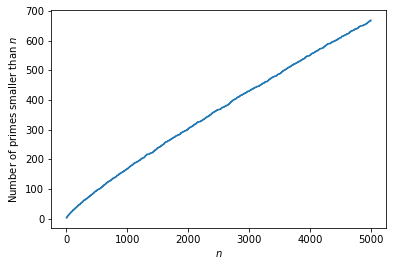

In [9]:
x = range(3, 5000)
primes_under_n = [len(sieve(n)) for n in x]

plt.plot(x, primes_under_n)
plt.xlabel('$n$')
plt.ylabel('Number of primes smaller than $n$')

In Jupyter we can profile it with this [line_profiler](https://github.com/pyutils/line_profiler)

In [10]:
%lprun -f sieve sieve(5000)

or we can profile it with [pyheat](https://github.com/csurfer/pyheatmagic)

669


C:\Users\Simon\anaconda3\lib\site-packages\pyheat\pyheat.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(row_labels, minor=False)


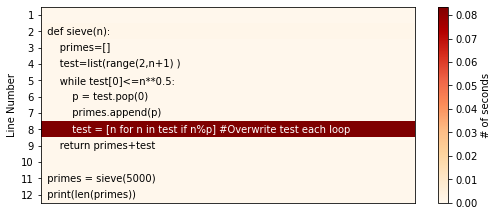

In [11]:
%%heat

def sieve(n):
    primes=[]
    test=list(range(2,n+1) )
    while test[0]<=n**0.5:
        p = test.pop(0) 
        primes.append(p)
        test = [n for n in test if n%p] #Overwrite test each loop
    return primes+test

primes = sieve(5000)
print(len(primes))

In [12]:
%%ipytest

# The test that reveals the problems
def test_sieve():
    assert sieve(19) == [2, 3, 5, 7, 11, 13, 17, 19]
    assert sieve(9) == [2, 3, 5, 7] # test for when n is a perfect square of a prime
    assert len(sieve(100)) == 25

.                                                                                            [100%]
1 passed in 0.02s


# Command line
When profiling on the command line, I again encourage you to use `line_profiler`. 

We will need the following command.

`kernprof -l -v spyderexample.py`

##### Run in command line

```python
@profile
def sieve(n):
    primes=[]
    test=list(range(3,n+1, 2) )
    while test[0]<=n**0.5:
        p = test.pop(0) 
        primes.append(p)
        test = [n for n in test if n%p] #Overwrite test each loop
    return primes+test

primes = sieve(2000)
print(len(primes))
```

In [ ]:
%%ipytest

# The test that reveals the problems
def test_sieve():
    assert sieve(19) == [2, 3, 5, 7, 11, 13, 17, 19]
    assert sieve(9) == [2, 3, 5, 7] # test for when n is a perfect square of a prime
    assert len(sieve(100)) == 25

# PEP8

Recall from lecture 1 [The Python Style Guide](https://www.python.org/dev/peps/pep-0008/) a.k.a. PEP8.  

It is a lengthy document that can be hard to memorize. Instead, there are nifty tools one can use to check the PEP8 compliance of a script. Consider for example [pycodestyle](https://pypi.org/project/pycodestyle/). Once it has been installed on your system, you can check a script with the following command.

`pycodestyle is_this_pep8.py`

##### Run in terminal

If you're working in a Jupyter notebook, you can use the magic command called [pycodestyle_magic](https://github.com/mattijn/pycodestyle_magic) instead. A demonstration:

**Note**: using `flake8=>4.0.0` will not let you use the `%flake8_on` magic command

In [ ]:
%load_ext pycodestyle_magic
# Using lines longer than 80 characters within a notebook could be reasonable
%flake8_on --max_line_length 99

In [ ]:
def sieve(n):
    primes=[]
    test=list(range(2,n+1) )
    while test[0]<=n**0.5:
        p = test.pop(0) 
        primes.append(p)
        test = [n for n in test if n%p] #Overwrite test each loop
    return primes+test

In [ ]:
def sieve(n):
    primes = []
    test = list(range(2, n + 1))
    while test[0] <= n**0.5:
        p = test.pop(0)
        primes.append(p)
        test = [n for n in test if n % p]  # Overwrite test each loop
    return primes + test

# Docstrings

Docstrings contain documentation information for different functions in Python and we have a few ways of accessing them. But first, let's write our own docstring. We recomend using the [NumPy docstring format](https://numpydoc.readthedocs.io/en/latest/format.html).

In [ ]:
def sieve(n):
    """Generate a list of prime numbers smaller than a given n.

    Parameters
    ----------
    n : int
        The upper limit (inclusive) of numbers to search.

    Returns
    -------
    list
        List of prime numbers smaller than or equal to n.
    """
    primes = []
    test = list(range(2, n + 1))
    while test[0] <= n**0.5:
        p = test.pop(0)
        primes.append(p)
        test = [n for n in test if n % p]  # Overwrite test each loop
    return primes + test

With the `help()` function we can access the docstring, which can give us useful information on what a function does. We want to write docstrings if we work with other people.

In [ ]:
help(sieve)

Let's also access the docstring of some existing function!

In [ ]:
from numpy import identity
help(identity)

Jupyter notebook also has some useful ways of accessing docstrings. We can use<code style="color:#AA29FF"><b>?</b></code> and <code style="color:#AA29FF"><b>??</b></code> for example to access the docstring and source code respectively

In [ ]:
identity?

In [ ]:
identity??

We can also utilize `Shift + Tab` inside a function.  
1 `Tab` brings up a brief docstring.  
2 `Tab` makes it bigger.  
3 `Tab` makes it linger for 10 seconds.  
4 `Tab` opens the pager.

In [ ]:
identity()

# Spyder
Spyder uses `line_profiler` too in the package [spyder-line-profiler](https://github.com/spyder-ide/spyder-line-profiler) 
##### NB. This tools seems to be broken for Spyder 5. If you have not updated to Spyder 5 it should work. 

Once installed you can use it by placing a `@profile` decorator in front of the functions that you want to be profiled. Then either press Shift + F10 or go to `Run > Profile line by line` to start the profiler.

A quick demonstration!

<video controls width="900" src="https://mikkolad.github.io/lundpython/imgs/spyder_line_profiler.mov" />

<h1><center> RISE </center></h1>